In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import math as mt
from tensorflow import keras
from tensorflow.keras import layers
import time
import wandb
import julia
import os
from julia import DynamicalSystems
from julia import Base
from julia import Main
from julia import DifferentialEquations
from matplotlib import rc
%load_ext julia.magic

physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

The julia.magic extension is already loaded. To reload it, use:
  %reload_ext julia.magic


In [15]:
%julia T = 500000. ; dt = 0.01
%julia ds = DynamicalSystems.Systems.henonheiles(DynamicalSystems.Systems.henonheiles_ics(0.1250, 10)[3])
%julia x = DynamicalSystems.Systems.trajectory(ds, T, dt = dt)[:,1];
%julia y = DynamicalSystems.Systems.trajectory(ds, T, dt = dt)[:,2];
%julia xdot = DynamicalSystems.Systems.trajectory(ds, T, dt = dt)[:,3];
%julia ydot = DynamicalSystems.Systems.trajectory(ds, T, dt = dt)[:,4];


x = Main.x.tolist()
y = Main.y.tolist()
xdot = Main.xdot.tolist()
ydot = Main.ydot.tolist()

Ty=[y[0]]
Tydot=[ydot[0]]

s = np.sign(x[1])

for i in range(1,len(x)):
    
    if np.sign(x[i]) != s:
        Ty.append(y[i])
        Tydot.append(ydot[i])
        s = np.sign(x[i])

len(Tydot)

159820

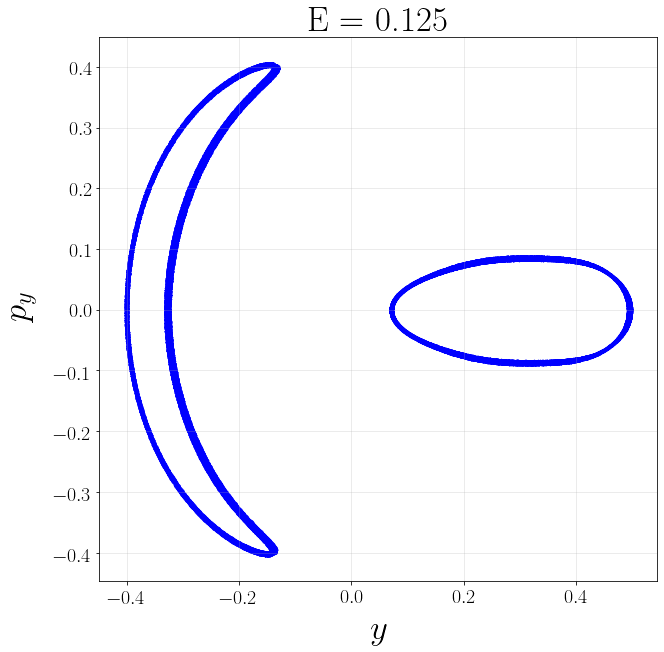

In [17]:
plt.figure(figsize=(10,10))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.title(r'E = 0.125', fontsize = 35)
plt.scatter(Ty,Tydot, color = "b", label = "target", linewidth=1, s=0.5)
plt.xlabel(r'$y$', fontsize=35, labelpad=8)
plt.ylabel(r'$p_{y}$', fontsize=35, labelpad=15)
plt.grid(axis='both', alpha=.3)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.legend(fontsize = 15, loc = 'upper right')
#plt.savefig("HenonHeiles_E01677")
plt.show()

In [26]:
os.remove("x_train_HH_E0125.txt")

f = open("x_train_HH_E0125.txt", "a")
for i in Ty:
    f.write(str(i))
    f.write("\n")
f.close()

In [27]:
os.remove("y_train_HH_E0125.txt")

f = open("y_train_HH_E0125.txt", "a")
for i in Tydot:
    f.write(str(i))
    f.write("\n")
f.close()